In [53]:
import pandas as pd

In [54]:
movies_df = pd.read_csv('movie_lense/movies.csv')
ratings_df = pd.read_csv('movie_lense/ratings.csv')

In [55]:
ratings_5_df = ratings_df.loc[ratings_df['rating'] == 5.0]

In [70]:
data = list()
for idx,row in movies_df.iterrows():
    genres = row['genres'].split('|')
    for genre in genres:
        data.append([row['movieId'], genre])
movie_genre_df = pd.DataFrame(data, columns=['movieId', 'genre'])

In [71]:
genre = 'Adventure'
ad_ids = movie_genre_df.loc[movie_genre_df['genre']==genre]['movieId']
ad_ids

0              1
5              2
19             8
23            10
30            13
           ...  
106011    193777
106028    193799
106044    193809
106078    193853
106100    193882
Name: movieId, Length: 4067, dtype: int64

In [72]:
ratings_5_gen_df = ratings_5_df.loc[(ratings_5_df['movieId'].isin(ad_ids))]
ratings_5_gen_df

,userId,movieId,rating,timestamp
109,4,316,5.0,1113767120
176,4,733,5.0,1113767139
217,4,1136,5.0,1113767266
218,4,1196,5.0,1127947461
235,4,1275,5.0,1113795785
...,...,...,...,...
27753357,283228,940,5.0,1354137259
27753369,283228,1198,5.0,1354159650
27753419,283228,3578,5.0,1379882818
27753422,283228,4886,5.0,1379882828


In [73]:
print(ratings_5_gen_df['timestamp'].describe())

count    9.390780e+05
mean     1.193332e+09
std      2.371589e+08
min      8.228736e+08
25%      9.725271e+08
50%      1.174520e+09
75%      1.446727e+09
max      1.537941e+09
Name: timestamp, dtype: float64


In [74]:
ratings_5_gen_ts_df = ratings_5_gen_df.loc[(ratings_5_gen_df['timestamp'] > 1420074061)]
ratings_5_gen_ts_df

,userId,movieId,rating,timestamp
1153,14,4886,5.0,1442171709
1210,14,78499,5.0,1442171305
1290,14,177765,5.0,1522101070
2039,27,1,5.0,1440448036
2045,27,1136,5.0,1440448640
...,...,...,...,...
27752517,283210,134130,5.0,1444495788
27752745,283219,260,5.0,1467479773
27752773,283219,6539,5.0,1467479896
27752776,283219,7153,5.0,1467479809


In [75]:
print(pd.DataFrame(ratings_5_gen_ts_df.groupby('userId')['rating'].count()).describe())

             rating
count  40253.000000
mean       7.372494
std       11.583922
min        1.000000
25%        2.000000
50%        4.000000
75%        8.000000
max      464.000000


In [88]:
filterd = pd.DataFrame(ratings_5_gen_ts_df.groupby('userId')['rating'].count())
print(filterd)
ids = filterd.loc[(filterd['rating']==4.0)].index
print(ids)

        rating
userId        
14           3
27           4
28           3
32           3
34           5
...        ...
283188       3
283193       2
283199       4
283210      12
283219       4

[40253 rows x 1 columns]
Int64Index([    27,    176,    305,    350,    409,    422,    464,    465,
               527,    632,
            ...
            282408, 282505, 282781, 282840, 283035, 283051, 283095, 283137,
            283199, 283219],
           dtype='int64', name='userId', length=3245)


In [89]:
b = ratings_5_gen_ts_df.loc[(ratings_5_gen_ts_df['userId'].isin(ids))]
b

,userId,movieId,rating,timestamp
2039,27,1,5.0,1440448036
2045,27,1136,5.0,1440448640
2052,27,78499,5.0,1440448859
2054,27,134853,5.0,1440448496
17854,176,6365,5.0,1499803439
...,...,...,...,...
27751827,283199,65088,5.0,1455717413
27752745,283219,260,5.0,1467479773
27752773,283219,6539,5.0,1467479896
27752776,283219,7153,5.0,1467479809


In [90]:
d = b.groupby('userId')['movieId'].apply(set)
d

userId
27             {1136, 1, 78499, 134853}
176          {34405, 6365, 6934, 60069}
305       {69844, 88125, 110102, 40815}
350          {5952, 1201, 3578, 139385}
409            {6016, 68954, 588, 1270}
                      ...              
283051        {5952, 4993, 7153, 54001}
283095       {46578, 3578, 86190, 7143}
283137           {1210, 924, 1196, 260}
283199           {65088, 1, 6377, 4886}
283219        {7153, 119145, 6539, 260}
Name: movieId, Length: 3245, dtype: object

In [92]:
indexes = d.index
n = len(indexes)
i = 0

edges = list()
filter_threshold = 4

while i < n:
    j = i + 1
    while j < n:
        if len(d[indexes[i]].intersection(d[indexes[j]])) >= int(filter_threshold):
            edge = tuple(sorted((indexes[i], indexes[j])))
            edges.append(edge)
        j = j + 1
    i = i + 1

0 1 4 4 0
1 2 4 4 0
2 3 4 4 0
3 4 4 4 0
4 5 4 4 0
5 6 4 4 0
6 7 4 4 0
7 8 4 4 0
8 9 4 4 1
9 10 4 4 0
10 11 4 4 3
11 12 4 4 1
12 13 4 4 1
13 14 4 4 0
14 15 4 4 0
15 16 4 4 0
16 17 4 4 0
17 18 4 4 0
18 19 4 4 0
19 20 4 4 0
20 21 4 4 1
21 22 4 4 1
22 23 4 4 0
23 24 4 4 0
24 25 4 4 0
25 26 4 4 0
26 27 4 4 0
27 28 4 4 0
28 29 4 4 0
29 30 4 4 0
30 31 4 4 0
31 32 4 4 0
32 33 4 4 0
33 34 4 4 0
34 35 4 4 0
35 36 4 4 0
36 37 4 4 0
37 38 4 4 0
38 39 4 4 2
39 40 4 4 0
40 41 4 4 0
41 42 4 4 0
42 43 4 4 1
43 44 4 4 0
44 45 4 4 0
45 46 4 4 1
46 47 4 4 0
47 48 4 4 1
48 49 4 4 0
49 50 4 4 0
50 51 4 4 0
51 52 4 4 0
52 53 4 4 0
53 54 4 4 0
54 55 4 4 0
55 56 4 4 0
56 57 4 4 1
57 58 4 4 0
58 59 4 4 0
59 60 4 4 0
60 61 4 4 0
61 62 4 4 0
62 63 4 4 1
63 64 4 4 0
64 65 4 4 0
65 66 4 4 0
66 67 4 4 0
67 68 4 4 0
68 69 4 4 1
69 70 4 4 0
70 71 4 4 0
71 72 4 4 0
72 73 4 4 1
73 74 4 4 1
74 75 4 4 0
75 76 4 4 1
76 77 4 4 0
77 78 4 4 1
78 79 4 4 0
79 80 4 4 1
80 81 4 4 0
81 82 4 4 0
82 83 4 4 0
83 84 4 4 0
84 85 4 4 0

601 602 4 4 0
602 603 4 4 0
603 604 4 4 0
604 605 4 4 0
605 606 4 4 0
606 607 4 4 0
607 608 4 4 0
608 609 4 4 3
609 610 4 4 0
610 611 4 4 0
611 612 4 4 0
612 613 4 4 1
613 614 4 4 0
614 615 4 4 0
615 616 4 4 0
616 617 4 4 0
617 618 4 4 0
618 619 4 4 0
619 620 4 4 0
620 621 4 4 0
621 622 4 4 0
622 623 4 4 1
623 624 4 4 0
624 625 4 4 0
625 626 4 4 0
626 627 4 4 1
627 628 4 4 0
628 629 4 4 0
629 630 4 4 1
630 631 4 4 0
631 632 4 4 1
632 633 4 4 0
633 634 4 4 0
634 635 4 4 0
635 636 4 4 0
636 637 4 4 1
637 638 4 4 1
638 639 4 4 0
639 640 4 4 0
640 641 4 4 0
641 642 4 4 0
642 643 4 4 0
643 644 4 4 1
644 645 4 4 0
645 646 4 4 1
646 647 4 4 0
647 648 4 4 0
648 649 4 4 0
649 650 4 4 1
650 651 4 4 0
651 652 4 4 1
652 653 4 4 0
653 654 4 4 1
654 655 4 4 0
655 656 4 4 0
656 657 4 4 0
657 658 4 4 0
658 659 4 4 1
659 660 4 4 0
660 661 4 4 0
661 662 4 4 0
662 663 4 4 0
663 664 4 4 0
664 665 4 4 0
665 666 4 4 0
666 667 4 4 0
667 668 4 4 0
668 669 4 4 0
669 670 4 4 0
670 671 4 4 1
671 672 4 4 0
672 67

1165 1166 4 4 0
1166 1167 4 4 0
1167 1168 4 4 0
1168 1169 4 4 0
1169 1170 4 4 0
1170 1171 4 4 1
1171 1172 4 4 1
1172 1173 4 4 1
1173 1174 4 4 1
1174 1175 4 4 3
1175 1176 4 4 0
1176 1177 4 4 0
1177 1178 4 4 0
1178 1179 4 4 1
1179 1180 4 4 0
1180 1181 4 4 0
1181 1182 4 4 0
1182 1183 4 4 0
1183 1184 4 4 0
1184 1185 4 4 0
1185 1186 4 4 1
1186 1187 4 4 0
1187 1188 4 4 0
1188 1189 4 4 0
1189 1190 4 4 1
1190 1191 4 4 1
1191 1192 4 4 0
1192 1193 4 4 1
1193 1194 4 4 0
1194 1195 4 4 0
1195 1196 4 4 0
1196 1197 4 4 0
1197 1198 4 4 0
1198 1199 4 4 1
1199 1200 4 4 0
1200 1201 4 4 2
1201 1202 4 4 0
1202 1203 4 4 1
1203 1204 4 4 0
1204 1205 4 4 0
1205 1206 4 4 0
1206 1207 4 4 0
1207 1208 4 4 1
1208 1209 4 4 0
1209 1210 4 4 2
1210 1211 4 4 1
1211 1212 4 4 1
1212 1213 4 4 2
1213 1214 4 4 0
1214 1215 4 4 0
1215 1216 4 4 0
1216 1217 4 4 0
1217 1218 4 4 0
1218 1219 4 4 0
1219 1220 4 4 0
1220 1221 4 4 0
1221 1222 4 4 0
1222 1223 4 4 0
1223 1224 4 4 0
1224 1225 4 4 0
1225 1226 4 4 0
1226 1227 4 4 1
1227 122

1681 1682 4 4 0
1682 1683 4 4 1
1683 1684 4 4 1
1684 1685 4 4 0
1685 1686 4 4 0
1686 1687 4 4 0
1687 1688 4 4 0
1688 1689 4 4 0
1689 1690 4 4 0
1690 1691 4 4 0
1691 1692 4 4 0
1692 1693 4 4 0
1693 1694 4 4 3
1694 1695 4 4 0
1695 1696 4 4 2
1696 1697 4 4 0
1697 1698 4 4 0
1698 1699 4 4 0
1699 1700 4 4 0
1700 1701 4 4 0
1701 1702 4 4 0
1702 1703 4 4 0
1703 1704 4 4 0
1704 1705 4 4 0
1705 1706 4 4 2
1706 1707 4 4 0
1707 1708 4 4 0
1708 1709 4 4 0
1709 1710 4 4 0
1710 1711 4 4 0
1711 1712 4 4 0
1712 1713 4 4 0
1713 1714 4 4 0
1714 1715 4 4 0
1715 1716 4 4 0
1716 1717 4 4 1
1717 1718 4 4 0
1718 1719 4 4 0
1719 1720 4 4 0
1720 1721 4 4 0
1721 1722 4 4 0
1722 1723 4 4 0
1723 1724 4 4 0
1724 1725 4 4 0
1725 1726 4 4 0
1726 1727 4 4 2
1727 1728 4 4 0
1728 1729 4 4 1
1729 1730 4 4 0
1730 1731 4 4 0
1731 1732 4 4 0
1732 1733 4 4 0
1733 1734 4 4 0
1734 1735 4 4 0
1735 1736 4 4 0
1736 1737 4 4 1
1737 1738 4 4 1
1738 1739 4 4 0
1739 1740 4 4 0
1740 1741 4 4 0
1741 1742 4 4 0
1742 1743 4 4 0
1743 174

2197 2198 4 4 0
2198 2199 4 4 0
2199 2200 4 4 0
2200 2201 4 4 0
2201 2202 4 4 0
2202 2203 4 4 0
2203 2204 4 4 0
2204 2205 4 4 0
2205 2206 4 4 1
2206 2207 4 4 0
2207 2208 4 4 1
2208 2209 4 4 0
2209 2210 4 4 0
2210 2211 4 4 0
2211 2212 4 4 0
2212 2213 4 4 1
2213 2214 4 4 0
2214 2215 4 4 0
2215 2216 4 4 1
2216 2217 4 4 2
2217 2218 4 4 0
2218 2219 4 4 1
2219 2220 4 4 0
2220 2221 4 4 1
2221 2222 4 4 1
2222 2223 4 4 0
2223 2224 4 4 0
2224 2225 4 4 0
2225 2226 4 4 1
2226 2227 4 4 0
2227 2228 4 4 0
2228 2229 4 4 0
2229 2230 4 4 0
2230 2231 4 4 0
2231 2232 4 4 0
2232 2233 4 4 0
2233 2234 4 4 0
2234 2235 4 4 1
2235 2236 4 4 1
2236 2237 4 4 1
2237 2238 4 4 0
2238 2239 4 4 0
2239 2240 4 4 0
2240 2241 4 4 0
2241 2242 4 4 2
2242 2243 4 4 1
2243 2244 4 4 0
2244 2245 4 4 0
2245 2246 4 4 0
2246 2247 4 4 2
2247 2248 4 4 0
2248 2249 4 4 0
2249 2250 4 4 0
2250 2251 4 4 1
2251 2252 4 4 2
2252 2253 4 4 0
2253 2254 4 4 0
2254 2255 4 4 0
2255 2256 4 4 0
2256 2257 4 4 0
2257 2258 4 4 0
2258 2259 4 4 0
2259 226

2714 2715 4 4 0
2715 2716 4 4 0
2716 2717 4 4 0
2717 2718 4 4 1
2718 2719 4 4 0
2719 2720 4 4 1
2720 2721 4 4 0
2721 2722 4 4 0
2722 2723 4 4 0
2723 2724 4 4 0
2724 2725 4 4 0
2725 2726 4 4 0
2726 2727 4 4 0
2727 2728 4 4 0
2728 2729 4 4 0
2729 2730 4 4 0
2730 2731 4 4 0
2731 2732 4 4 0
2732 2733 4 4 0
2733 2734 4 4 2
2734 2735 4 4 0
2735 2736 4 4 1
2736 2737 4 4 0
2737 2738 4 4 1
2738 2739 4 4 0
2739 2740 4 4 0
2740 2741 4 4 3
2741 2742 4 4 0
2742 2743 4 4 0
2743 2744 4 4 0
2744 2745 4 4 0
2745 2746 4 4 1
2746 2747 4 4 0
2747 2748 4 4 0
2748 2749 4 4 0
2749 2750 4 4 1
2750 2751 4 4 0
2751 2752 4 4 0
2752 2753 4 4 0
2753 2754 4 4 0
2754 2755 4 4 0
2755 2756 4 4 0
2756 2757 4 4 0
2757 2758 4 4 0
2758 2759 4 4 0
2759 2760 4 4 0
2760 2761 4 4 0
2761 2762 4 4 0
2762 2763 4 4 0
2763 2764 4 4 0
2764 2765 4 4 0
2765 2766 4 4 1
2766 2767 4 4 0
2767 2768 4 4 0
2768 2769 4 4 0
2769 2770 4 4 0
2770 2771 4 4 0
2771 2772 4 4 0
2772 2773 4 4 0
2773 2774 4 4 2
2774 2775 4 4 0
2775 2776 4 4 0
2776 277

IndexError: index 3245 is out of bounds for axis 0 with size 3245

In [93]:
len(edges)

111491

In [94]:
import networkx as nx
graph = nx.Graph()

In [95]:
graph.add_edges_from(edges)

In [96]:
from networkx.algorithms import community
comp = community.girvan_newman(graph)

In [97]:
print(len(graph.nodes))
print(len(graph.edges))

1887
111491


In [98]:
cms = tuple(sorted(c) for c in next(comp))

In [99]:
len(cms)

124

In [100]:
cms

([27,
  527,
  705,
  745,
  782,
  1527,
  1614,
  1763,
  2021,
  2213,
  2451,
  2998,
  3127,
  3254,
  3385,
  3399,
  3627,
  3633,
  3644,
  3922,
  4369,
  4593,
  4922,
  5627,
  5937,
  6445,
  6452,
  6663,
  6691,
  6814,
  6830,
  6837,
  7156,
  7428,
  7515,
  7741,
  7945,
  8072,
  8114,
  8208,
  9103,
  9443,
  9522,
  9850,
  10238,
  10275,
  10949,
  11852,
  11887,
  11918,
  11924,
  11986,
  12066,
  12227,
  12252,
  12761,
  12841,
  13143,
  13304,
  14122,
  14144,
  14224,
  14592,
  14657,
  14659,
  14751,
  14779,
  14960,
  15495,
  15840,
  15923,
  16273,
  16385,
  16411,
  16618,
  17018,
  17035,
  17701,
  17954,
  18004,
  18022,
  18074,
  18152,
  18201,
  18350,
  18732,
  18826,
  19595,
  19608,
  19674,
  19686,
  20328,
  20530,
  20689,
  20717,
  20723,
  20744,
  20791,
  20898,
  20973,
  21481,
  21684,
  21885,
  21948,
  21973,
  22090,
  22126,
  22256,
  22464,
  22497,
  22515,
  23295,
  23408,
  23495,
  23513,
  23667,
  2413

cms

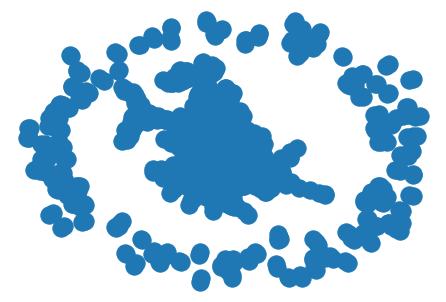

In [101]:
nx.draw(graph)

In [103]:
for cm in cms:
    if len(cm) > 10:
        print(len(cm))

1442
42
80
18
11
